<a href="https://colab.research.google.com/github/vixkly/pythoncollabory/blob/master/Machine_Learning_Introdu%C3%A7%C3%A3o_a_classifica%C3%A7%C3%A3o_com_SKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parte 1

*   Treinar algoritmos;
*   Definir características (features) do que desejamos classificar;
*   Classificar em categorias;
*   Utilizar o módulo linearSVC e accuracy_score;
*   Utilizar o método fit;
*   Prever dados com a função predict;
*   Calcular a taxa de acerto do modelo;
*   Comparar testes e previsões;
*   Utilizar a função soma;
*   Padronizar variáveis;

In [1]:
#features (1 sim, 0 não)
#pelo longo?
#perna curta?
#faz auau?

porco1 = [0, 1, 0]
porco2 = [0, 1, 1]
porco3 = [1, 1, 0]

cachorro1 = [0, 1, 1]
cachorro2 = [1, 0, 1]
cachorro3 = [1, 1, 1]

#1 -> porco, 0 -> cachorro
treino_x = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
treino_y = [1, 1, 1, 0, 0, 0] #labels

In [2]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(treino_x, treino_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [3]:
animalteste = [1,0,1]
model.predict([animalteste])

array([0])

In [4]:
misterio1 = [1,0,0]
misterio2=[0,1,1]
misterio3 = [1,1,1]

teste_x = [misterio1, misterio2, misterio3]
teste_y = [1,0,0]


previsoes = model.predict(teste_x)

In [5]:
corretos = (previsoes == teste_y).sum()
total = len(teste_x)
taxa_de_acerto = corretos/total
print("Taxa de acerto é de: %.2f" % (taxa_de_acerto * 100))

Taxa de acerto é de: 100.00


In [6]:
from sklearn.metrics import accuracy_score

In [7]:
taxa_de_acerto = accuracy_score(teste_y, previsoes)
print("Taxa de acerto é de: %.2f" % (taxa_de_acerto * 100))

Taxa de acerto é de: 100.00


#Parte 2



*   Abrir arquivo CSV;
*   Imprimir as primeiras linhas com a função head;
*   Renomear as colunas;
*   Utilizar a função shape para ver a quantidade de elementos;
*   Separar dados para treino e teste;
*   Definir a ordem para os números aleatórios (SEED); 
*   Utilizar a função value_counts.



In [8]:
import pandas as pd

In [9]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"
dados = pd.read_csv(uri)
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [10]:
mapa = {
    "home" : "principal",
    "how_it_works" : "como_funciona",
    "contact" : "contato",
    "bought" : "comprou"
}
dados = dados.rename(columns = mapa)

In [11]:
x = dados[["principal", "como_funciona", "contato"]]
y = dados["comprou"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: comprou, dtype: int64

In [12]:
dados.shape

(99, 4)

In [13]:
treino_x = x[:75]
treino_y = y[:75]
teste_x = x[75:]
teste_y = y[75:]

print("Treino com %d elementos e teste com %d elementos" % (len(treino_x), len(teste_x)))

Treino com 75 elementos e teste com 24 elementos


In [14]:
from sklearn.svm import LinearSVC

modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)
print("Acuracia de %.2f%%" % taxa_de_acerto)

Acuracia de 0.96%


**Bibliotecada separando treino e teste**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25)
print("Treino com %d elementos e teste com %d elementos" % (len(treino_x), len(teste_x)))


modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)
print("Acuracia de %.2f%%" % taxa_de_acerto)

Treino com 74 elementos e teste com 25 elementos
Acuracia de 0.96%


In [16]:
treino_y.value_counts()

0    47
1    27
Name: comprou, dtype: int64

In [17]:
teste_y.value_counts()

0    19
1     6
Name: comprou, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        random_state = SEED, test_size = 0.25,
                                                        stratify = y)
print("Treino com %d elementos e teste com %d elementos" % (len(treino_x), len(teste_x)))


modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)
print("Acuracia de %.2f%%" % taxa_de_acerto)

Treino com 74 elementos e teste com 25 elementos
Acuracia de 0.96%


In [19]:
treino_y.value_counts()

0    49
1    25
Name: comprou, dtype: int64

In [20]:
teste_y.value_counts()

0    17
1     8
Name: comprou, dtype: int64

#Um projeto de baixa dimensionalidade e o baseline

*   Trocar valores;
*   Usar a biblioteca seaborn;
*   Gerar um gráfico com dados do CSV;
*   Definir cores no gráfico;
*   Gerar gráficos distintos;
*   Criação de um algoritmo base;
*   Capturar os valores mínimos e máximos.
*   Utilizar a função arange do numpy



In [21]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [22]:
mapa = {
    "expected_hours" : "hora_estimada",
    "price" : "preco",
    "unfinished" : "nao_finalizado"
}

dados = dados.rename(columns=mapa)
dados.head()

,nao_finalizado,hora_estimada,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [23]:
troca = {
    0 : 1,
    1 : 0
}

dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,hora_estimada,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


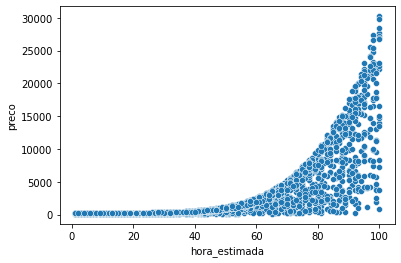

In [24]:
import seaborn as sns
sns.scatterplot(x="hora_estimada", y="preco", data=dados)

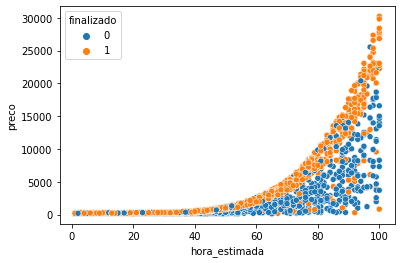

In [25]:
sns.scatterplot(x="hora_estimada", y="preco", hue = "finalizado", data=dados)

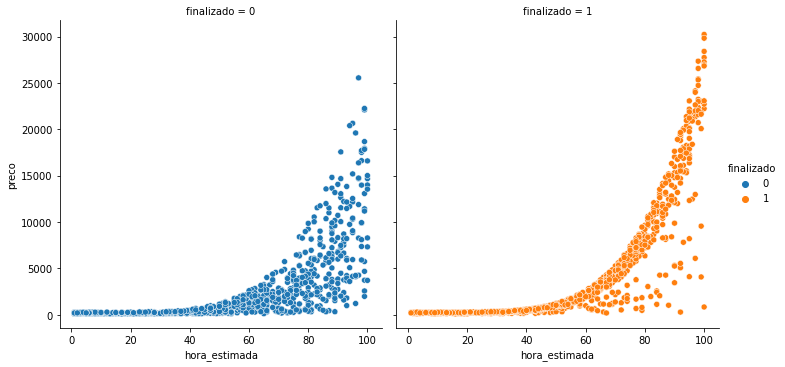

In [26]:
sns.relplot(x="hora_estimada", y="preco", hue = "finalizado", col = "finalizado", data=dados)

In [27]:
x = dados[['hora_estimada', 'preco']]
y = dados['finalizado']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                        stratify = y)
print("Treino com %d elementos e teste com %d elementos" % (len(treino_x), len(teste_x)))


modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print("Acuracia de %.2f" % taxa_de_acerto)

Treino com 1617 elementos e teste com 540 elementos
Acuracia de 64.44


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [29]:
import numpy as np
previsoes_de_base  = np.ones(540) #baseline
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print("A acurácia de previsões de base foi %.2f%%" % acuracia)

A acurácia de previsões de base foi 52.59%


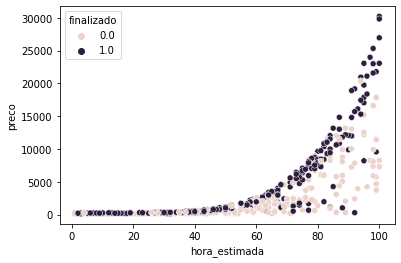

In [30]:
sns.scatterplot(x="hora_estimada", y="preco", hue = teste_y, data=dados)

In [31]:
x_min = teste_x.hora_estimada.min()
x_max = teste_x.hora_estimada.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [32]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [33]:
xx, yy = np.meshgrid(eixo_x,eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [34]:
z = modelo.predict(pontos)
Z = z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

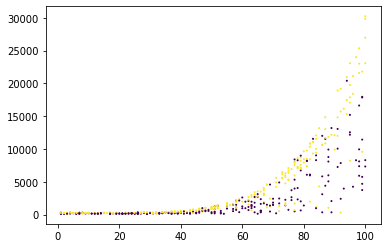

In [35]:
import matplotlib.pyplot as plt
plt.scatter(teste_x.hora_estimada, teste_x.preco, c=teste_y, s=1)

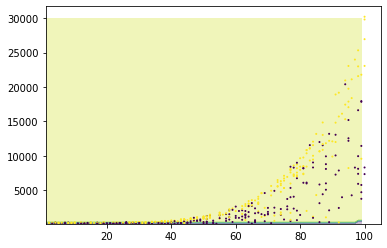

In [36]:
import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.hora_estimada, teste_x.preco, c=teste_y, s=1)

#Support Vector Machine e a não linearidade

*   Utilizar o módulo Support Vector Machine;
*   Gerar valores randômicos com o módulo SVC;
*   Utilizar o módulo Standard Scale.



In [37]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                        stratify = y)
print("Treino com %d elementos e teste com %d elementos" % (len(treino_x), len(teste_x)))


modelo = SVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print("Acuracia de %.2f" % taxa_de_acerto)

Treino com 1617 elementos e teste com 540 elementos
Acuracia de 55.19


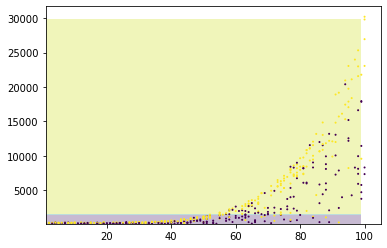

In [38]:
x_min = teste_x.hora_estimada.min()
x_max = teste_x.hora_estimada.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x,eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
Z = z.reshape(xx.shape)

import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.hora_estimada, teste_x.preco, c=teste_y, s=1)

In [39]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                        stratify = y)
print("Treino com %d elementos e teste com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print("Acuracia de %.2f" % taxa_de_acerto)

Treino com 1617 elementos e teste com 540 elementos
Acuracia de 66.85


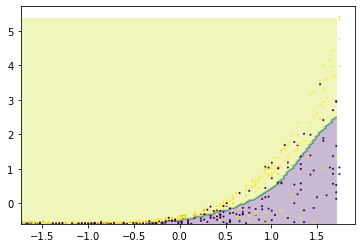

In [40]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x,eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)

#Dummy classifiers e árvore de decisão

*   Alterar dados em colunas;
*   Utilizar o módulo datetime;
*   Criar colunas;
*   Remover colunas e linhas;
*   Utilizar o módulo dummie para gerar colunas;
*   Utilizar o módulo graphviz para gerar gráficos;
*  Definir propriedades gráficas na árvore de decisão.



In [41]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [42]:
a_renomear = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' : 'vendido'
}

dados = dados.rename(columns=a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [43]:
a_trocar = {
    'no' : 0,
    'yes': 1
}

dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [44]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,20
1,1,7843,1998,40557.96,1,22
2,2,7109,2006,89627.50,0,14
3,3,26823,2015,95276.14,0,5
4,4,7935,2014,117384.68,1,6


In [45]:
dados['kms_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,kms_por_ano
0,0,21801,2000,30941.02,1,20,35085.22134
1,1,7843,1998,40557.96,1,22,12622.05362
2,2,7109,2006,89627.50,0,14,11440.79806
3,3,26823,2015,95276.14,0,5,43167.32682
4,4,7935,2014,117384.68,1,6,12770.11290


In [46]:
dados = dados.drop(columns= ['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], axis = 1)
dados.head()

,preco,vendido,idade_do_modelo,kms_por_ano
0,30941.02,1,20,35085.22134
1,40557.96,1,22,12622.05362
2,89627.50,0,14,11440.79806
3,95276.14,0,5,43167.32682
4,117384.68,1,6,12770.11290


In [59]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = dados[['preco', 'idade_do_modelo', 'kms_por_ano']]
y = dados['vendido']

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                        stratify = y)
print("Treino com %d elementos e teste com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print("Acuracia de %.2f" % taxa_de_acerto)

Treino com 7500 elementos e teste com 2500 elementos
Acuracia de 58.00


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [63]:
dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 52.64%


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [62]:
dummy_mostfrequent = DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(treino_x, treino_y)
previsoes = dummy_mostfrequent.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy mostfrequent foi %.2f%%" % acuracia)

A acurácia do dummy mostfrequent foi 58.00%


In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 79.28%


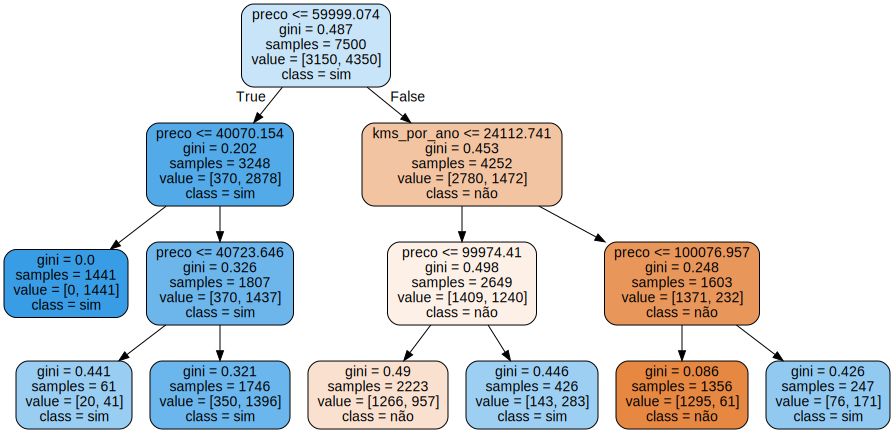

In [76]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, 
                           filled = True, rounded = True,
                           feature_names=features,
                           class_names = ['não', 'sim'])
grafico = graphviz.Source(dot_data)
grafico